# Fashion MNIST Image Classifier – TensorFlow Project

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import tensorflow.keras as tk
fashion_mnist = tk.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
labels=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

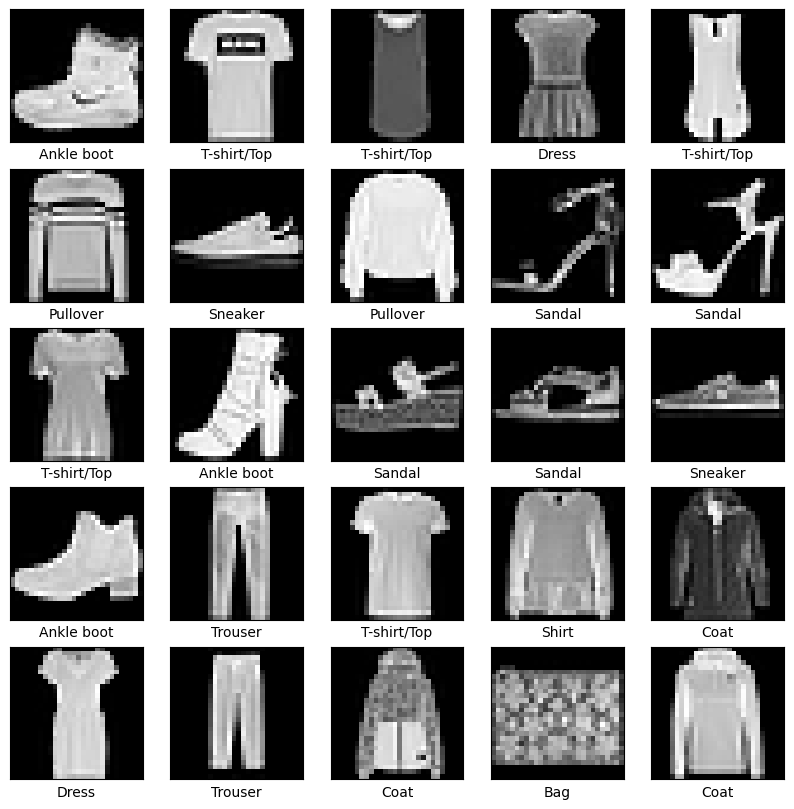

In [44]:
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap='grey')
  plt.xlabel(labels[train_labels[i]])
plt.show()

In [45]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images[..., np.newaxis], train_labels, epochs=5, 
          validation_data=(test_images[..., np.newaxis], test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7835 - loss: 0.6102 - val_accuracy: 0.8750 - val_loss: 0.3423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8891 - loss: 0.3039 - val_accuracy: 0.8965 - val_loss: 0.2875
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9079 - loss: 0.2489 - val_accuracy: 0.8959 - val_loss: 0.2804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9198 - loss: 0.2170 - val_accuracy: 0.9065 - val_loss: 0.2620
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9285 - loss: 0.1905 - val_accuracy: 0.9088 - val_loss: 0.2513


In [48]:
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9056 - loss: 0.2593
Test accuracy: 0.9088000059127808


In [49]:
from PIL import Image, ImageOps
image_path = r'shirt2.jpg'
image = Image.open(image_path).convert('L')  
image = ImageOps.invert(image)  
image = image.resize((28, 28))  
image = np.array(image) / 255.0  
image = np.expand_dims(image, axis=(0, -1)) 

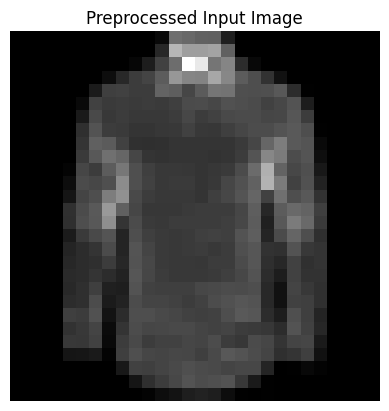

In [52]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Preprocessed Input Image")
plt.axis('off')
plt.show()

In [50]:
predictions = model.predict(image)
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [51]:
print(f"Predicted label: {labels[predicted_class]}")
print("Probabilities for each class:")
for i, prob in enumerate(predictions[0]):
    print(f"{labels[i]}: {prob:.4f}")

Predicted label: Shirt
Probabilities for each class:
T-shirt/Top: 0.0416
Trouser: 0.0005
Pullover: 0.2627
Dress: 0.0131
Coat: 0.0679
Sandal: 0.0000
Shirt: 0.6131
Sneaker: 0.0000
Bag: 0.0007
Ankle boot: 0.0003
